<br> 
<br>

## 0. Introduction of the sample DB for this practice
- What is SQLite & Official document for SQLite @ https://www.sqlitetutorial.net/what-is-sqlite/
- SQLite Sample Database (chinook.db) @ https://www.sqlitetutorial.net/sqlite-sample-database/

<br>
<hr>
<br>

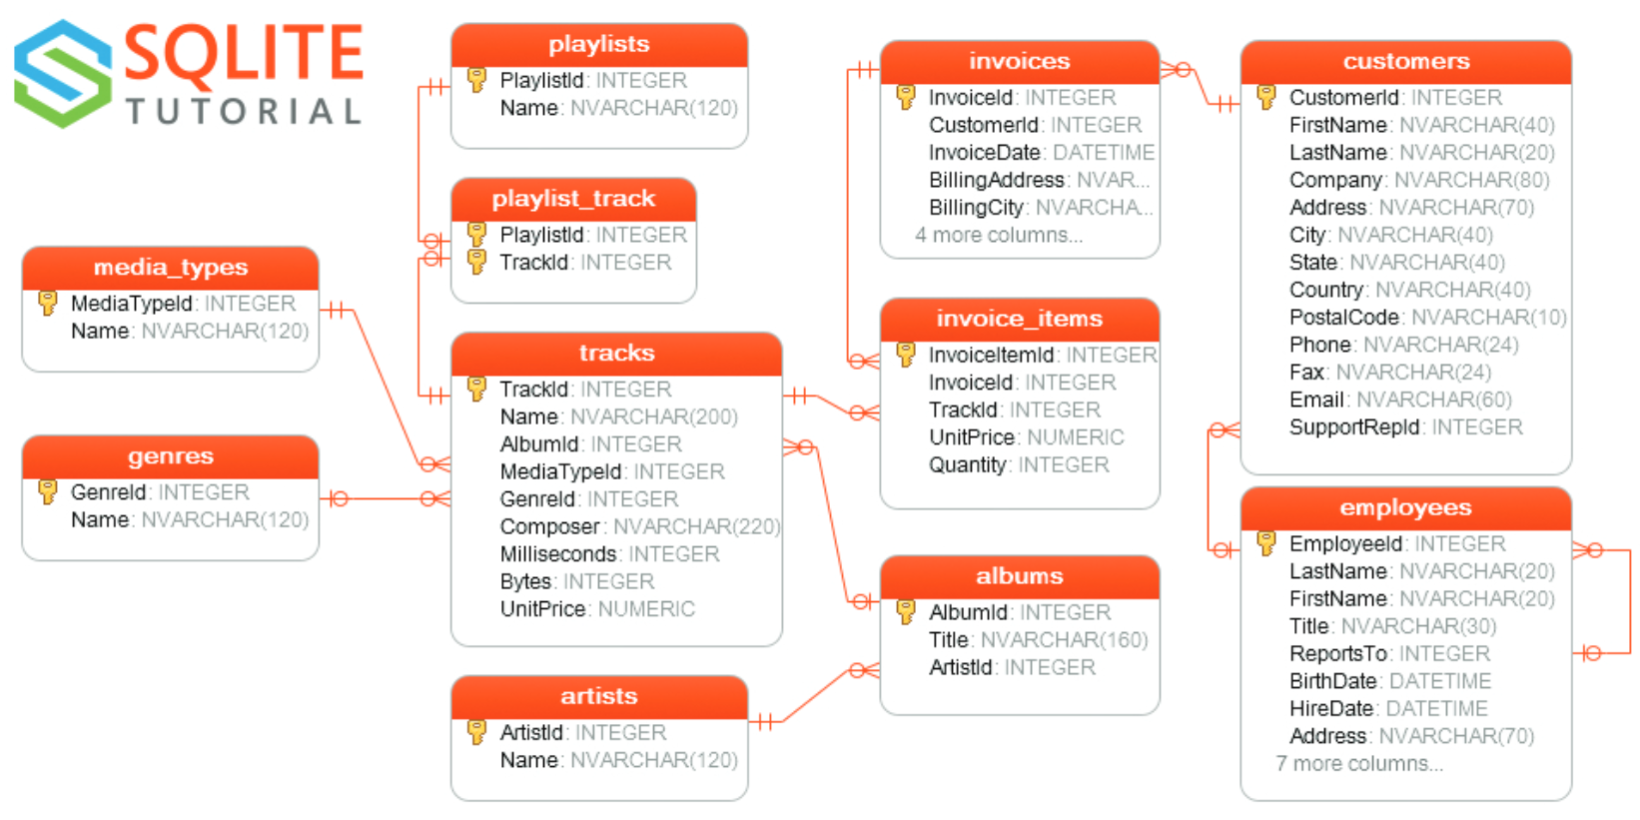

<br>

<hr>
<br>

[ 1. 거래 자체에 대한 정보 ]

**invoice_items** : 특정 곡에 대한 거래 정보
<br>
**invoices** : invoice_items의 거래 건들에 대한 판매 정보
<br>
<br>

[ 2. 거래에 참여한 사람들의 정보 ]

**customers** : 곡을 구매한 고객들에 대한 정보
<br>
**employees** : 고객들에게 곡을 판매한 직원에 대한 정보 
<br>
<br>

[ 3. 거래된 곡의 정보 ]

**playlist_track** : 각 플레이리스트에 속한 곡(트랙)
<br>
**playlists** : 각 플레이리스트의 이름
<br>
**tracks** : 각 곡에 대한 정보 전체
>  - **media_types** : 곡 파일의 형식
>  - **genres** : 곡의 장르
>  - **albums** : 곡이 속한 앨범
>  - **artists** : 곡이 속한 앨범의 아티스트 
<br>
<br>

<hr>

1. **employees** : employees data such as employee id, last name, first name, etc. It also has a field named ReportsTo to specify who reports to whom.
<br>


2. **customers** : customers data.
 <br>
 
3. **invoices** & **invoice_items** : invoice data. The invoices table stores invoice header data and the invoice_items table stores the invoice line items data.
 <br>
 
4. **artists** : artists data. It is a simple table that contains only the artist id and name.
 <br>
 
5. **albums** : data about a list of tracks. Each album belongs to one artist. However, one artist may have multiple albums.
<br>

6. **media_types** : media types such as MPEG audio and AAC audio files.
<br>

7. **genres** : music types such as rock, jazz, metal, etc.
<br>

8. **tracks** : the data of songs. Each track belongs to one album.
<br>

9. **playlists** & **playlist_track** : playlists table store data about playlists. Each playlist contains a list of tracks. Each track may belong to multiple playlists. The relationship between the playlists table and tracks table is many-to-many. The playlist_track table is used to reflect this relationship.

<br>
<br>

### Create connection & SQLite3 Cursor (a method of the connection object)

In [1]:
import sqlite3 # built-in library (Python 2.x & 3.x)

dbpath = "chinook.db" 

conn = sqlite3.connect(dbpath)
cur = conn.cursor() 

# conn.cursor(), conn.commit/rollback(), conn.close() <- conn.commit() : 저장 vs conn.rollback() : 마지막 commit 이후의 변경사항 모두 취소 
# cur.execute/executescript/executemany(), cur.fetchone/fetchall()

<br> 
<br>

## 1. JOINing tables

<br>

- **Visual Representation of SQL Joins** @ https://www.codeproject.com/Articles/33052/Visual-Representation-of-SQL-Joins
- SQLite FULL OUTER JOIN Emulation @ https://www.sqlitetutorial.net/sqlite-full-outer-join/ 
  <br>(SQLite does not support the RIGHT JOIN clause and also the FULL OUTER JOIN clause)
  
<br>

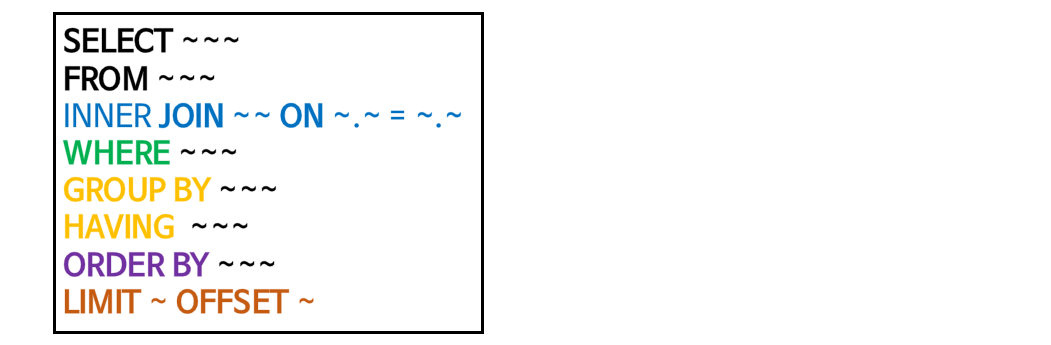

<br>

### 1) INNER JOIN (from A inner join B on A.x1 = B.x2)

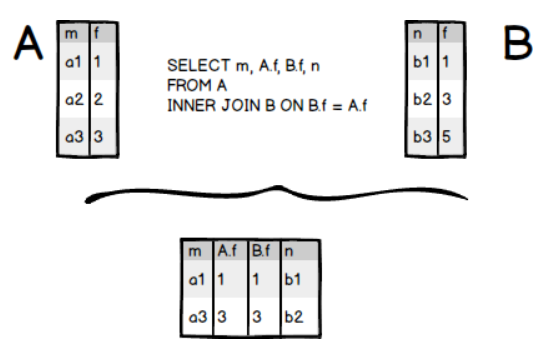

In [105]:
script = """
SELECT 
    *
FROM 
    albums
""" 
cur.execute(script) 

result = cur.fetchall()
result[0:5]

[(1, 'For Those About To Rock We Salute You', 1),
 (2, 'Balls to the Wall', 2),
 (3, 'Restless and Wild', 2),
 (4, 'Let There Be Rock', 1),
 (5, 'Big Ones', 3)]

In [106]:
import pandas as pd

script = """
SELECT 
    *
FROM 
    albums
""" 

df = pd.read_sql_query(script, conn)
df.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [45]:
script = """
SELECT 
    *
FROM 
    artists
""" 

df = pd.read_sql_query(script, conn)
df.head()

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [46]:
script = """
SELECT 
    Title,    -- <- albums(A)
    Name      -- <- artists(B)
FROM 
    albums    -- Table albums(A)
INNER JOIN 
    artists   -- Table artists(B)
ON 
    artists.ArtistId = albums.ArtistId;   -- 순서는 바뀌어도 괜찮습니다.
"""

df = pd.read_sql_query(script, conn)
df.head()

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith


In [58]:
script = """
SELECT 
    albums.Title,
    artists.Name    -- 이처럼 Table명을 밝혀서 써주면 더욱 코드가 명료해집니다.
FROM 
    albums
? ? artists ? artists.ArtistId = albums.ArtistId;    -- from A inner join B on A.x1 = B.x2
"""

df = pd.read_sql_query(script, conn)
df.head()

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith


In [47]:
script = """
SELECT
    l.Title, 
    r.Name    -- 아래 테이블 이름 바로 다음에 alias를 지정해주면 l. & r. 와 같이 alias를 활용할 수 있습니다.
FROM
    albums l 
INNER JOIN artists r ON r.ArtistId = l.ArtistId;
""" 

df = pd.read_sql_query(script, conn)
df.head()

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith


In [48]:
script = """
SELECT
   Title, 
   Name
FROM
   albums
INNER JOIN artists ?(ArtistId);   -- key가 되는 열의 이름(여기서는 'ArtistId')이 같을 경우, 
                                      -- [ USING(열이름) ] 으로 [ A.열이름 = B.열이름 ]을 대체할 수 있습니다.
""" 

df = pd.read_sql_query(script, conn)
df.head()

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith


In [51]:
script = """
-- 특정한 곡(tracks)에 대하여 해당 곡이 포함된 앨범(albums)과 해당 앨범을 제작한 아티스트(artists)의 정보를 함께 확인하고자 합니다.
-- tracks : 특정한 곡의 정보 (album 정보 포함)
-- albums : 여러 곡들을 포함하고 있는 특정한 앨범의 정보 (tracks & artists 정보 포함)
-- artists : 특정한 앨범에 대한 아티스트의 정보 (album 정보 포함)

SELECT
    trackid,
    tracks.name ? track,   -- AS 를 통해 alias를 만들어줄 수 있습니다. (아래 실행 결과를 참고)
    albums.title ? album,
    artists.name ? artist
FROM
    tracks
INNER JOIN albums ON albums.albumid = tracks.albumid
INNER JOIN artists ON artists.artistid = albums.artistid;
""" 

df = pd.read_sql_query(script, conn)
df.head()

,TrackId,track,album,artist
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC
1,6,Put The Finger On You,For Those About To Rock We Salute You,AC/DC
2,7,Let's Get It Up,For Those About To Rock We Salute You,AC/DC
3,8,Inject The Venom,For Those About To Rock We Salute You,AC/DC
4,9,Snowballed,For Those About To Rock We Salute You,AC/DC


In [55]:
script = """
SELECT
    trackid,
    tracks.name AS Track,
    albums.title AS Album,
    artists.name AS Artist,
    artists.artistid AS ArtistID  -- 이전 실행 결과에 새로이 추가됨
FROM
    tracks
INNER JOIN albums ON albums.albumid = tracks.albumid
INNER JOIN artists ON artists.artistid = albums.artistid
WHERE
    artists.artistid = 10;  -- 이전 실행 결과에 새로이 추가됨 
                            -- (JOIN 대상이 되는 table 중 원하는 table을 기준으로 조건을 정할 수 있습니다.)
""" 

df = pd.read_sql_query(script, conn)
df.head()

,TrackId,Track,Album,Artist,ArtistID
0,123,Quadrant,The Best Of Billy Cobham,Billy Cobham,10
1,124,Snoopy's search-Red baron,The Best Of Billy Cobham,Billy Cobham,10
2,125,"Spanish moss-""A sound portrait""-Spanish moss",The Best Of Billy Cobham,Billy Cobham,10
3,126,Moon germs,The Best Of Billy Cobham,Billy Cobham,10
4,127,Stratus,The Best Of Billy Cobham,Billy Cobham,10


<br>

### 2) LEFT JOIN (LEFT OUTER JOIN)

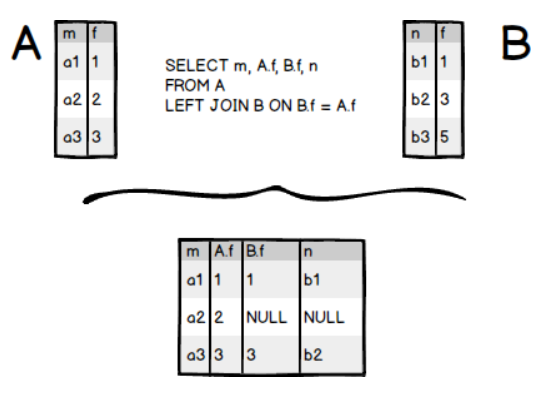

In [49]:
script = """
SELECT
    Name, 
    Title
FROM
    artists
LEFT JOIN albums ON artists.ArtistId = albums.ArtistId
ORDER BY 
    Name;
""" 

df = pd.read_sql_query(script, conn)
df.head(15) 

# There are multiple 'None'(Null)s in the right column

,Name,Title
0,A Cor Do Som,None
1,AC/DC,For Those About To Rock We Salute You
2,AC/DC,Let There Be Rock
3,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I"
4,Aaron Goldberg,Worlds
5,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites
6,Academy of St. Martin in the Fields Chamber En...,Sir Neville Marriner: A Celebration
7,"Academy of St. Martin in the Fields, John Birc...","Fauré: Requiem, Ravel: Pavane & Others"
8,"Academy of St. Martin in the Fields, Sir Nevil...",Bach: Orchestral Suites Nos. 1 - 4
9,"Academy of St. Martin in the Fields, Sir Nevil...",None


In [50]:
script = """
SELECT
    Name,  -- <- artists (A)
    Title  -- <- albums (B)
FROM
    artists
LEFT JOIN albums ON artists.ArtistId = albums.ArtistId
WHERE Title IS NULL
ORDER BY Name;
""" 

df = pd.read_sql_query(script, conn)
df.head(15) 

,Name,Title
0,A Cor Do Som,None
1,"Academy of St. Martin in the Fields, Sir Nevil...",None
2,Aerosmith & Sierra Leone's Refugee Allstars,None
3,Avril Lavigne,None
4,Azymuth,None
5,Baby Consuelo,None
6,Banda Black Rio,None
7,Barão Vermelho,None
8,Bebel Gilberto,None
9,Ben Harper,None


In [5]:
script = """
SELECT *
FROM 
    employees
LIMIT 3;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

# 아래 실행 결과에서 ReportsTo 열의 숫자는 [해당 직원이 보고해야할 상급자의 EmployeeId 값]입니다.
# 누가 누구로부터 보고를 받는지 확인하고자 합니다.

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com


In [8]:
script = """
SELECT m.firstname || ' ' || m.lastname AS 'Manager',
       e.firstname || ' ' || e.lastname AS 'Receives reports from'  
FROM 
    employees e
INNER JOIN 
    employees m 
ON 
    m.employeeid = e.reportsto    -- 테이블 employees의 복제본이 존재한다고 상상하고 2개의 동일한 테이블을 서로 JOIN 한다고 이해
ORDER BY 
    manager;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,Manager,Receives reports from
0,Andrew Adams,Nancy Edwards
1,Andrew Adams,Michael Mitchell
2,Michael Mitchell,Robert King
3,Michael Mitchell,Laura Callahan
4,Nancy Edwards,Jane Peacock


<br> 
<br>

## 2. Grouping data (GROUP BY & HAVING)

<br>

- SQLite **Aggregate** Functions **(AVG, COUNT, SUM, etc.)** @ https://www.sqlitetutorial.net/sqlite-aggregate-functions/

- SQLite **Date** Functions **(DATE, TIME, DATETIME, STRFTIME, etc)** @ https://www.sqlitetutorial.net/sqlite-date-functions/

- SQLite **String** Functions **(LENGTH, UPPER, ||, etc.)** @ https://www.sqlitetutorial.net/sqlite-string-functions/

- (Appendix) SQLite Window Functions (Ranking & Value) @ https://www.sqlitetutorial.net/sqlite-window-functions/

<br>

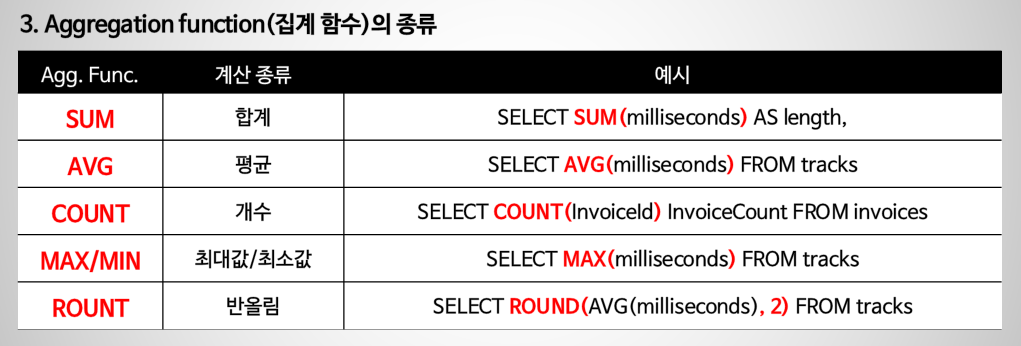

In [63]:
script = """
SELECT
    *
FROM
    tracks;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [68]:
script = """
SELECT
    albumid,
    ?(trackid)    -- 동일한 앨범 ID를 갖고 있는 모든 곡(track)들의 수를 카운트(COUNT) 
                  -- 조회(SELECT)의 대상이 되는 항목에 대해 바로 집계함수를 적용할 수 있습니다.
FROM
    tracks
GROUP BY
    albumid
ORDER BY 
    ?(trackid) DESC;   -- 앨범마다 속한 총 트랙의 수를 기준으로 하여 내림차순 정렬 (많은 곡이 수록된 앨범일수록 위로)
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,COUNT(trackid)
0,141,57
1,23,34
2,73,30
3,229,26
4,230,25


In [14]:
script = """
SELECT
    albumid,
    COUNT(trackid)
FROM
    tracks
GROUP BY
    albumid
?             -- ~~~을 가지고 있는(having)
    albumid = 1;   -- HAVING은 반드시 앞에 GROUP BY가 있어야 합니다 (WHERE 와의 차이점)
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,COUNT(trackid)
0,1,10


In [18]:
script = """
SELECT
    albumid,
    COUNT(trackid)
FROM
    tracks
WHERE 
    albumid = 1   
GROUP BY
    albumid;      -- [WHERE 를 통해 먼저 전체 데이터를 대상으로 추려내느냐] or [GROUP BY 로 묶어낸 후 그룹에 대해 추려내느냐] 
                  -- 기본적으로는 WHERE를 통해 먼저 데이터를 추려내면 GROUP BY를 적용할 데이터의 수가 줄어드므로 더 효율적임
                  -- 그러나 다음 cell과 같이 HAVING은 집계함수를 사용할 수 있으나, WHERE는 집계함수를 사용할 수 없음
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,COUNT(trackid)
0,1,10


In [19]:
script = """
SELECT
    albumid,
    COUNT(trackid)
FROM
    tracks
GROUP BY
    albumid
HAVING 
    ?(trackid) ? 18 ? 20;    -- 앨범에 속한 곡(track)의 수가 18 이상 20 이하(between A and B)인 앨범들
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,COUNT(trackid)
0,21,18
1,37,20
2,54,20
3,55,20
4,72,18


In [21]:
script = """
SELECT
    albumid,
    COUNT(trackid)
FROM
    tracks
WHERE
    COUNT(trackid) BETWEEN 18 AND 20    -- (에러발생) WHERE는 HAVING과 비슷해보이나 이처럼 집계함수의 적용이 불가능합니다. 
GROUP BY
    albumid;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

DatabaseError: Execution failed on sql '
SELECT
    albumid,
    COUNT(trackid)
FROM
    tracks
WHERE
    COUNT(trackid) BETWEEN 18 AND 20    -- 앨범에 속한 곡(track)의 수가 18 이상 20 이하(between A and B)인 앨범들
GROUP BY
    albumid;
': misuse of aggregate: COUNT()

In [25]:
script = """
SELECT
    tracks.albumid,
    title,            -- 앨범의 제목
    COUNT(trackid)
FROM
    tracks
INNER JOIN albums ON albums.albumid = tracks.albumid
GROUP BY
    tracks.albumid;   -- albums.albumid 로 바꿔도 괜찮습니다.
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,Title,COUNT(trackid)
0,1,For Those About To Rock We Salute You,10
1,2,Balls to the Wall,1
2,3,Restless and Wild,3
3,4,Let There Be Rock,8
4,5,Big Ones,15


In [73]:
script = """
SELECT
    tracks.albumid,
    title,
    COUNT(trackid)
FROM
    tracks
INNER JOIN albums ON albums.albumid = tracks.albumid
GROUP BY
    tracks.albumid
HAVING 
    COUNT(trackid) > 15;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,Title,COUNT(trackid)
0,18,Body Count,17
1,21,Prenda Minha,18
2,23,Minha Historia,34
3,24,Afrociberdelia,23
4,26,Acústico MTV [Live],17


In [30]:
script = """
SELECT
    albumid,
    SUM(tracks.milliseconds) AS length,    -- (앨범에 속한 모든) 곡의 길이
    SUM(tracks.bytes) AS size              -- (앨범에 속한 모든) 곡의 용량
FROM
    tracks
GROUP BY
    albumid;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,length,size
0,1,2400415,78270414
1,2,342562,5510424
2,3,858088,14613294
3,4,2453259,80239024
4,5,4411709,144277453


In [74]:
script = """
SELECT
    albumid,
    SUM(milliseconds) length,  -- 사실 이처럼 AS를 생략하여도 alias를 쓸 수 있으나, 되도록 밝혀서 써주도록 하겠습니다.
    SUM(bytes) size
FROM
    tracks
GROUP BY
    albumid;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,length,size
0,1,2400415,78270414
1,2,342562,5510424
2,3,858088,14613294
3,4,2453259,80239024
4,5,4411709,144277453


In [76]:
script = """
SELECT
    tracks.albumid,
    title,
    ?(tracks.milliseconds),           -- 앨범에 속한 곡들 중 가장 짧은(MIN) 곡의 길이
    ?(tracks.milliseconds),           -- 앨범에 속한 곡들 중 가장 긴(MAX) 곡의 길이
    ?(?(tracks.milliseconds), ?)  -- 앨범에 속한 곡들의 길이를 평균(AVG)한 다음 소수점 둘째(2) 자리까지만 나타나도록 반올림(ROUND)
                                        -- ROUND(X, n)에서 [n번째 자리에서 반올림]이 아니라 [n번째 자리까지 표시]라는 점에 유의 
FROM
    tracks
INNER JOIN albums ON albums.albumid = tracks.albumid
GROUP BY
    tracks.albumid;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,Title,min(milliseconds),max(milliseconds),"round(avg(milliseconds),2)"
0,1,For Those About To Rock We Salute You,199836,343719,240041.50
1,2,Balls to the Wall,342562,342562,342562.00
2,3,Restless and Wild,230619,375418,286029.33
3,4,Let There Be Rock,215196,369319,306657.38
4,5,Big Ones,215875,381231,294113.93


In [77]:
script = """
SELECT
    *
FROM
    invoices;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [31]:
script = """
-- 주문일자(InvoiceDate)에서 년도 값을 뽑아내어 해당 년도에 발생한 주문(InvoiceId)의 수량을 확인

SELECT
   ?('?', InvoiceDate) AS InvoiceYear,  -- STRing-Format TIME & 4글자 년도값은 '%Y' (포맷 참고 @ https://bit.ly/32BNyhd)
   ?(InvoiceId) AS InvoiceCount             -- 해당 년도에 발생한 주문(InvoiceId)의 총 수량(COUNT)
FROM
   invoices
GROUP BY
   ?('?', InvoiceDate)  -- 주문일자(InvoiceDate)의 년도 값을 기준으로 그룹화
ORDER BY
   InvoiceYear;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,InvoiceYear,InvoiceCount
0,2009,83
1,2010,83
2,2011,83
3,2012,83
4,2013,80


<br> 
<br>

## 3. Subquery

In [107]:
script = """
SELECT *
FROM albums
WHERE title = 'Let There Be Rock';   -- 앨범의 제목
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AlbumId,Title,ArtistId
0,4,Let There Be Rock,1


In [32]:
script = """
-- Let There Be Rock 라는 제목을 가진 앨범의 수록곡을 모두 확인하고자 함

SELECT trackid,
       name,
       albumid
FROM tracks
WHERE albumid = (                     -- 우리가 Let There Be Rock 라는 제목을 가진 앨범의 아이디 값을 알지 못한다면?
   SELECT albumid
   FROM albums
   WHERE title = 'Let There Be Rock'
);
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,TrackId,Name,AlbumId
0,15,Go Down,4
1,16,Dog Eat Dog,4
2,17,Let There Be Rock,4
3,18,Bad Boy Boogie,4
4,19,Problem Child,4


In [33]:
script = """
SELECT trackid,
       name,
       albumid
FROM tracks
WHERE albumid = 4;   -- 위와 동일한 결과를 확인할 수 있습니다.
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,TrackId,Name,AlbumId
0,15,Go Down,4
1,16,Dog Eat Dog,4
2,17,Let There Be Rock,4
3,18,Bad Boy Boogie,4
4,19,Problem Child,4


In [34]:
# 각 앨범에 속한 곡들의 총 용량(SUM(bytes))을 계산한 후, 
# 앨범별 총 용량의 평균값(AVG)를 계산하고자 함

script = """
SELECT AVG(SUM(bytes))  -- SELECT 문에서 집계함수의 결과 값에 바로 중첩하여 집계함수를 적용할 수 없습니다.
FROM tracks
GROUP BY albumid;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

DatabaseError: Execution failed on sql '
SELECT AVG(SUM(bytes))
FROM tracks
GROUP BY albumid;
': misuse of aggregate function SUM()

In [103]:
script = """
SELECT
    *
FROM
    tracks;
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [92]:
script = """
-- 아래와 같이 먼저 각 앨범에 속한 곡들의 총 용량을 계산해줍니다.

SELECT
    SUM(bytes) AS SIZE
FROM
    tracks
GROUP BY
    albumid;
"""  

df = pd.read_sql_query(script, conn)
df.head() 

,SIZE
0,78270414
1,5510424
2,14613294
3,80239024
4,144277453


In [95]:
script = """
SELECT
    AVG(SIZE)
FROM                        -- 위에서 만들어낸 결과를 하나의 테이블로 하여 이로부터 SIZE 열의 평균값을 계산할 수 있습니다.
    (SELECT
         SUM(bytes) AS SIZE
     FROM
         tracks
     GROUP BY
         albumid);
""" 

df = pd.read_sql_query(script, conn)
df.head() 

,AVG(SIZE)
0,3.382889e+08


In [114]:
conn.close()